In [244]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [245]:
center1 = 0.0+1.25im
r = 1.0
Δs = π/50
z1, n̂1, Δslist1 = circle(center1,r,Δs)
unit_sources1 = Source.Point.(z1, 1.0);
targets1 = Elements.position.(unit_sources1);

In [246]:
center2 = 0.0-1.25im
z2, n̂2, Δslist2 = circle(center2,r,Δs)
unit_sources2 = Source.Point.(z2, 1.0);
targets2 = Elements.position.(unit_sources2);

In [247]:
z = ComplexF64[]
append!(z,z1);
append!(z,z2);

In [248]:
n̂ = ComplexF64[]
append!(n̂,n̂1);
append!(n̂,n̂2);

In [249]:
Δslist = Float64[]
append!(Δslist,Δslist1);
append!(Δslist,Δslist2);

In [250]:
targets = ComplexF64[]
append!(targets,targets1)
append!(targets,targets2)

unit_sources = Source.Point.(z, 1.0);

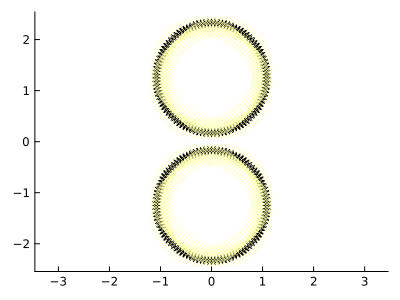

In [251]:
plot(unit_sources, ratio = 1)
quiver!(real.(targets), imag.(targets), quiver = 0.15.*(real.(n̂), imag.(n̂)), color = :black)
plot!(unit_sources, markersize = 10)

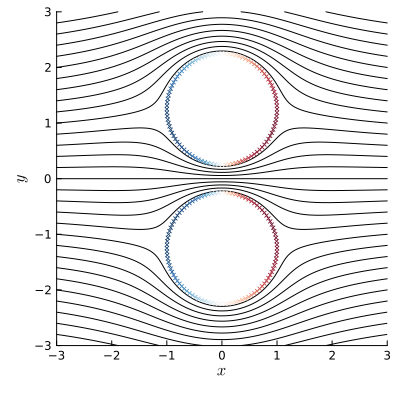

In [252]:
U∞ = 1.0+0im
other_elements = Freestreams.Freestream(U∞)
sources, us, Cp, tx, ty = simulate_flow(unit_sources, Δslist, n̂, other_elements)

plot(tx, ty, color = colorant"black", xlabel = L"x", ylabel = L"y",
               xlim = (-3, 3), ylim = (-3, 3), size = (400, 400))
plot!(sources, markersize = 2, color = :RdBu)

#savefig("hw2_optional_2.png")

In [253]:
length(Cp)

200

In [258]:
θ = range(0, 2π, length=100)
plot(θ,Cp[1:100],xlim=(0,2π),xlabel=L"\theta",ylabel=L"C_p",label="Cp on the upper cylinder", legend=true)

savefig("hw2_optional_4.png")

"C:\\Users\\bill\\MAE150A\\hw\\hw2\\hw2_optional_4.png"

In [255]:
length(n̂1)

100

In [256]:
F = -sum(Cp[1:100].*n̂1.*Δslist1)


-1.734723475976807e-15 - 2.988908335111797im